In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [19]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows before removal: 5268
Number of duplicate rows after removal: 0


In [20]:
print(f"Number of rows with negative Quantity before removal: {df[df['Quantity'] <= 0].shape[0]}")
df = df[df['Quantity'] > 0]
print(f"Number of rows with negative Quantity after removal: {df[df['Quantity'] <= 0].shape[0]}")

print(f"Number of rows with negative UnitPrice before removal: {df[df['UnitPrice'] <= 0].shape[0]}")
df = df[df['UnitPrice'] > 0]
print(f"Number of rows with negative UnitPrice after removal: {df[df['UnitPrice'] <= 0].shape[0]}")

Number of rows with negative Quantity before removal: 10587
Number of rows with negative Quantity after removal: 0
Number of rows with negative UnitPrice before removal: 1176
Number of rows with negative UnitPrice after removal: 0


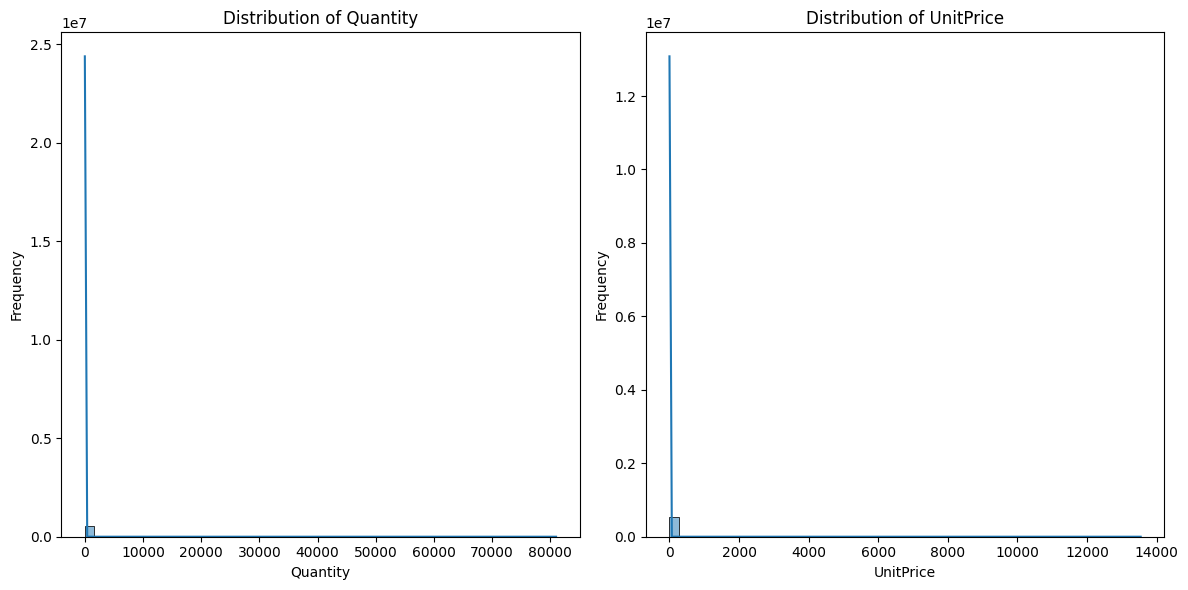

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [42]:

df_cleaned = df[(abs(df['Quantity_Zscore']) <= 3) & (abs(df['UnitPrice_Zscore']) <= 3)].copy()

print(f"Number of rows before removing outliers: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")

df_cleaned.dropna(subset=['CustomerID'], inplace=True)
print(f"Number of rows after removing missing CustomerIDs: {df_cleaned.shape[0]}")

df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)
print("CustomerID column converted to integer type in df_cleaned.")


print("\nFirst 5 rows of the dataframe after removing outliers and missing CustomerIDs:")
display(df_cleaned.head())

df = df_cleaned.copy()

Number of rows before removing outliers: 391996
Number of rows after removing outliers: 391996
Number of rows after removing missing CustomerIDs: 391996
CustomerID column converted to integer type in df_cleaned.

First 5 rows of the dataframe after removing outliers and missing CustomerIDs:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_Zscore,UnitPrice_Zscore,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,-0.029541,-0.038029,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.029541,-0.014756,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,-0.016743,-0.032488,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.029541,-0.014756,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-0.029541,-0.014756,20.34


In [41]:

print(f"Number of missing CustomerIDs in the current dataframe: {df['CustomerID'].isnull().sum()}")

missing_customer_id_rows = df[df['CustomerID'].isnull()]
if not missing_customer_id_rows.empty:
    print("\nSample rows with missing CustomerID:")
    display(missing_customer_id_rows.head())

Number of missing CustomerIDs in the current dataframe: 0


In [30]:
from scipy.stats import zscore

df['Quantity_Zscore'] = zscore(df['Quantity'])

outliers_quantity_zscore = df[abs(df['Quantity_Zscore']) > 3]

print(f"Number of Quantity outliers (Z-score > 3): {outliers_quantity_zscore.shape[0]}")

df['UnitPrice_Zscore'] = zscore(df['UnitPrice'])

outliers_price_zscore = df[abs(df['UnitPrice_Zscore']) > 3]

print(f"Number of UnitPrice outliers (Z-score > 3): {outliers_price_zscore.shape[0]}")

print("\nSample Quantity Outliers (Z-score > 3):")
display(outliers_quantity_zscore[['Quantity', 'Quantity_Zscore']].head())

print("\nSample UnitPrice Outliers (Z-score > 3):")
display(outliers_price_zscore[['UnitPrice', 'UnitPrice_Zscore']].head())

Number of Quantity outliers (Z-score > 3): 520
Number of UnitPrice outliers (Z-score > 3): 781

Sample Quantity Outliers (Z-score > 3):


,Quantity,Quantity_Zscore
730,600,3.771333
870,480,3.003479
3917,600,3.771333
4850,1824,11.603435
4945,2880,18.360542



Sample UnitPrice Outliers (Z-score > 3):


,UnitPrice,UnitPrice_Zscore
246,165.00,4.462845
1814,569.77,15.677487
3041,607.49,16.722565
4989,295.00,8.064652
5450,254.43,6.940611


Top 10 Selling Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2008
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1612
ASSORTED COLOUR BIRD ORNAMENT         1392
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1151
POSTAGE                               1086
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1041
Name: count, dtype: int64


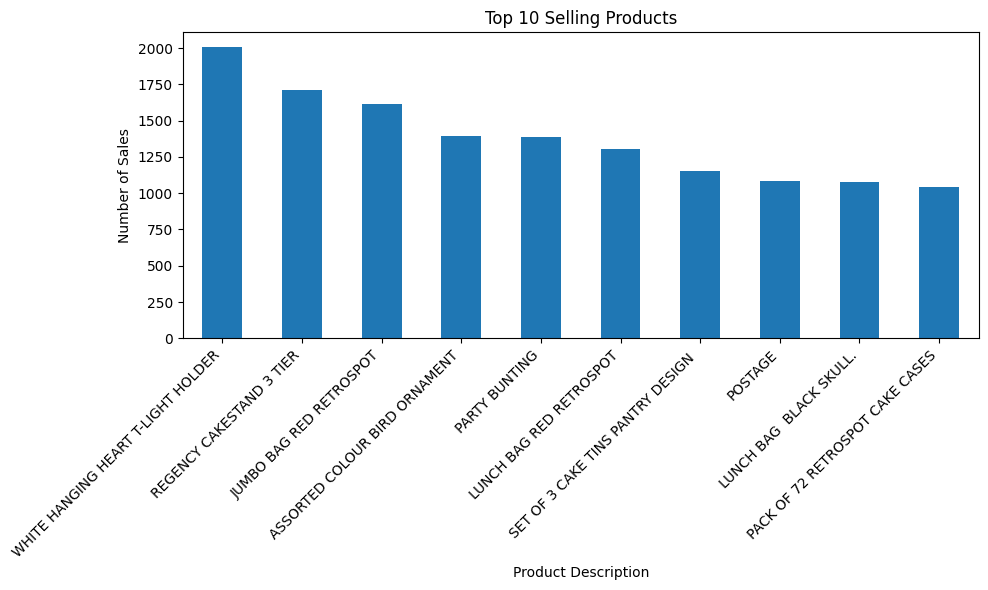

In [32]:
top_products = df['Description'].value_counts().head(10)
print("Top 10 Selling Products:")
print(top_products)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Countries by Number of Sales:
Country
United Kingdom    348622
Germany             9016
France              8316
EIRE                7219
Spain               2479
Netherlands         2346
Belgium             2031
Switzerland         1841
Portugal            1447
Australia           1169
Name: count, dtype: int64


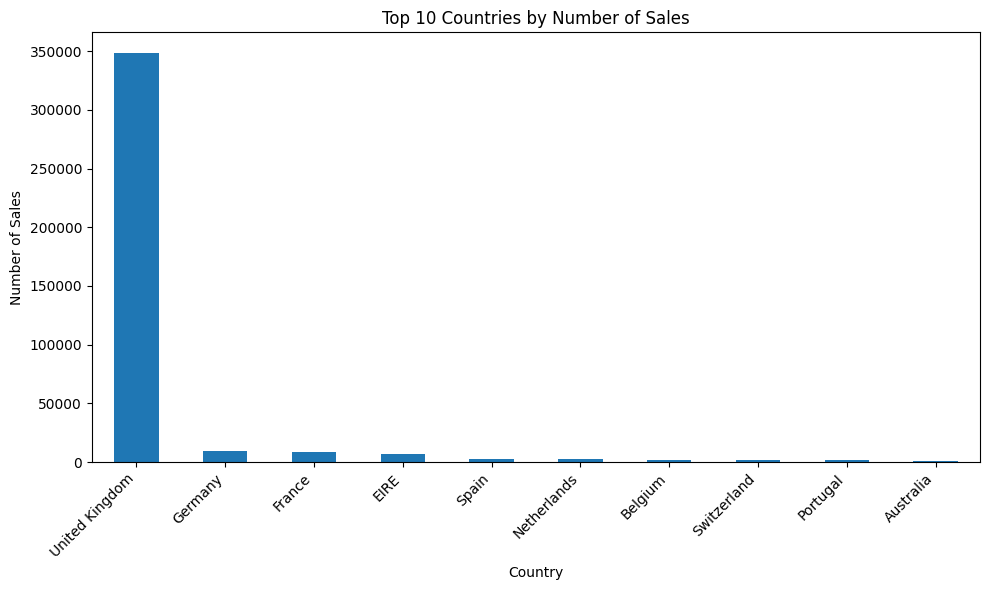

In [33]:
top_countries = df['Country'].value_counts().head(10)
print("\nTop 10 Countries by Number of Sales:")
print(top_countries)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Sales')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
df.dropna(subset=['CustomerID'], inplace=True)
df.dropna(subset=['Description'], inplace=True)

In [35]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Quantity_Zscore,0
UnitPrice_Zscore,0


In [59]:
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']
print("Added 'Total_Amount' column.")

Added 'Total_Amount' column.


In [58]:

cluster_analysis = customer_clustering_data.groupby('Cluster')[['NumberTransactions', 'AvgQuantityPerTransaction', 'TotalMonetary']].mean()

print("Analysis of Cluster Characteristics (Mean Values):")
display(cluster_analysis)

Analysis of Cluster Characteristics (Mean Values):


,NumberTransactions,AvgQuantityPerTransaction,TotalMonetary
Cluster,,,
0,3.883787,12.387691,1434.290552
1,74.761905,59.297635,78242.634762
2,5.205479,166.868568,4697.660411


In [57]:

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
customer_clustering_data['Cluster'] = kmeans.fit_predict(X_scaled)

print("Customer data with cluster assignments:")
display(customer_clustering_data.head())

Customer data with cluster assignments:


,CustomerID,NumberTransactions,AvgQuantityPerTransaction,TotalMonetary,Cluster
0,12347,7,13.505495,4310.00,0
1,12348,4,75.516129,1797.24,0
2,12349,1,8.750000,1457.55,0
3,12350,1,11.588235,334.40,0
4,12352,7,6.500000,1665.74,0


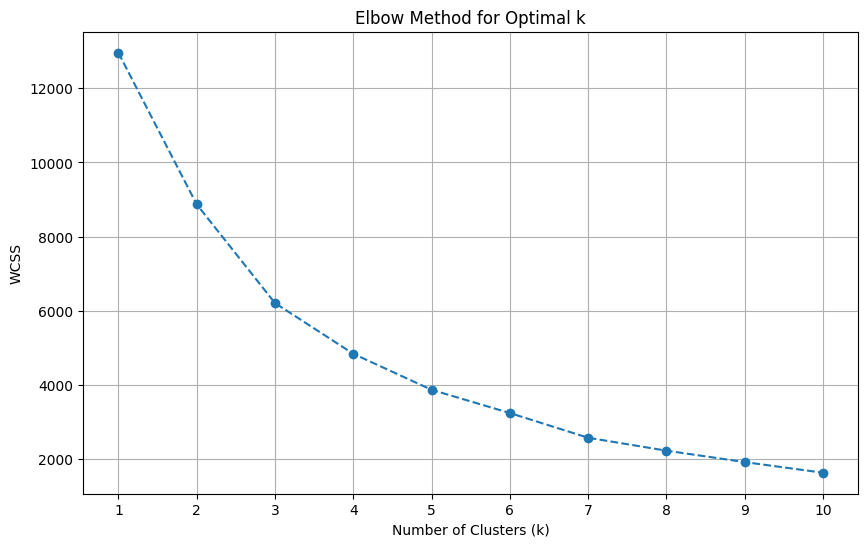

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress potential warnings from KMeans
warnings.filterwarnings("ignore", module="sklearn")

# Select the features for clustering
X = customer_clustering_data[['NumberTransactions', 'AvgQuantityPerTransaction', 'TotalMonetary']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate WCSS for different numbers of clusters
wcss = []
# Trying a range of k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # Add n_init
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [56]:
customer_clustering_data = df.groupby('CustomerID').agg(
    NumberTransactions=('InvoiceNo', 'nunique'),
    AvgQuantityPerTransaction=('Quantity', 'mean'),
    TotalMonetary=('Total_Amount', 'sum')
).reset_index()

print("Simplified customer data for clustering:")
display(customer_clustering_data.head())

Simplified customer data for clustering:


,CustomerID,NumberTransactions,AvgQuantityPerTransaction,TotalMonetary
0,12347,7,13.505495,4310.00
1,12348,4,75.516129,1797.24
2,12349,1,8.750000,1457.55
3,12350,1,11.588235,334.40
4,12352,7,6.500000,1665.74


In [55]:
from sklearn.model_selection import train_test_split

X = customer_clustering_data[['NumberTransactions', 'AvgQuantityPerTransaction', 'TotalMonetary']]
y = customer_clustering_data['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split into training and testing sets.")
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")

Data split into training and testing sets.
Training set shape (X_train): (3023, 3)
Testing set shape (X_test): (1296, 3)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

print("Random Forest and Logistic Regression models trained.")
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

print("Predictions made on the testing data.")
# Evaluate Random Forest Model
print("--- Random Forest Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

print("\n--- Logistic Regression Model Evaluation ---")
# Evaluate Logistic Regression Model
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("\nClassification Report:\n", classification_report(y_test, lr_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_predictions))


Random Forest and Logistic Regression models trained.
Predictions made on the testing data.
--- Random Forest Model Evaluation ---
Accuracy: 0.9976851851851852

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      0.62      0.77         8
           2       0.95      1.00      0.98        20

    accuracy                           1.00      1296
   macro avg       0.98      0.88      0.91      1296
weighted avg       1.00      1.00      1.00      1296


Confusion Matrix:
 [[1268    0    0]
 [   2    5    1]
 [   0    0   20]]

--- Logistic Regression Model Evaluation ---
Accuracy: 0.9976851851851852

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      0.62      0.77         8
           2       0.95      1.00      0.98        20

    accuracy                           1.

In [64]:
df.to_excel('cleaned_online_retail_data.xlsx', index=False)

print("Updated dataset saved to 'cleaned_online_retail_data.xlsx'.")

Updated dataset saved to 'cleaned_online_retail_data.xlsx'.
